# Vrije val
## General
Template for labjournaal. See https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html for options to use markdown.

**Name:**  Tahlia van den Berg
**Title of the experiment:**  Vrije val
**Starting date:**  26-11-2025
**Expected enddate:** 27-11-2025 
**Partner:** Sarah ilyas 
**Goal of the experiment:**  Bepaling van de vierde significante cijfer van de zwaartekrachtsversnelling g, binnen een foutmarge van 0.5%
**Research question:**  What is the fourth significant figure of g?
**Expectations or Hypothesis:**  that after multiple freefall measurements the acceleration rate of our object will be close to -9.812 m/s^2
**Desired accuracy:**  <0.5%




In [547]:
#import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit 

## Preparation
 


**Assignments:**  

**Method:**  meet een hoogte van 1 meter waarvan je de object laat vallen. meet deze 5 keer om zeker te zijn. Laat het object van de 1 meter hoogte 10 keer vallen, begin je stopwatch wanneer je het los laat en eindig de stopwatch wanneer het object de grond aanraakt. 

**Theory:**  

Wanneer je een object laat vallen in vacuüm zal het object een beweging beschreven volgens:

$$ y(t) = y_0 + v_0t+\frac{gt^2}{2}$$

Door de valtijd voor verschillende hoogtes te bepalen, volgt uit bovenstaande vergelijking de waarde voor de zwaartekrachtsversnelling.

**Independent variable:**  height, initial velocity

**Dependent variable:**  time

**Controlled variablen:**  acceleration

**Measurement instruments \& Settings:**  stopwatch, measuring tape, object

**Procedure:** we wil measure a height of 1 meter accuratley, therefore measure this height 5 times.  then we will drop an object form this height 10 times. when we let go of the object we will start a stopwatch and when the object hits the ground we will stop the stopwatch. these measurements will be recorded and fed through a code that determines the downward acceleraiton of this object.   

**Setup(drawing or picture):**  

**Notes:**  

**About accuracy:** the starting and stopping of the stopwatch can be quite inaccurate because the height is quite small, so small deviations will have great affects, although the affects of air resistance will be less noticeable.  Because this is also being done with just our eyes and a delayed reaction time of our fingers, instead of a camera and computer program to record the data, it can be less accurate. 


## Execution

In [742]:
# Measurements: Explain the names of variables provide only raw data in np.arrays!

#time for different heights
time1 = np.mean(np.array([0.3274650, 0.3277562, 0.3277902, 0.3278810, 0.3277634]))
time12 = np.std(time1)
time13 = np.sqrt(time12)

time2 = np.mean(np.array([0.3488725, 0.3489163, 0.3489681, 0.3485791, 0.3488845]))
time22 = np.std(time2)
time23 = np.sqrt(time22)

time3 = np.mean(np.array([0.3689624, 0.3691971, 0.3686344, 0.369469, 0.3682160]))
time32 = np.std(time3)
time33 = np.sqrt(time32)

time4 = np.mean(np.array([0.3880115, 0.3882410, 0.3887341, 0.3885345, 0.3884612]))
time42 = np.std(time4)
time43 = np.sqrt(time42)

time5 = np.mean(np.array([0.4070758, 0.4069158, 0.4071672, 0.4069912, 0.4071138]))
time52 = np.std(time5)
time53 = np.sqrt(time52)

time6 = np.mean(np.array([0.4250965, 0.4248325, 0.4253762, 0.4252376, 0.4251519]))
time62 = np.std(time6)
time63 = np.sqrt(time62)

time7 = np.mean(np.array([0.4425365, 0.4424967, 0.4426497, 0.4421785, 0.4437315]))
time72 = np.std(time7)
time73 = np.sqrt(time72)

time8 = np.mean(np.array([0.4597154, 0.4597158, 0.4597610, 0.4598174, 0.4597601]))
time82 = np.std(time8)
time83 = np.sqrt(time82)

time9 = np.mean(np.array([0.4767253, 0.4767423, 0.4768153, 0.4752857, 0.4762045]))
time92 = np.std(time9)
time93 = np.sqrt(time92)

time10 = np.mean(np.array([0.5079890, 0.5086054, 0.5080176, 0.5082638, 0.5081342]))
time102 = np.std(time10)
time103 = np.sqrt(time102)

time = np.array([time1, time2, time3, time4,  time5, time6, time7, time8, time9, time10]) #seconds
#time = np.array([0.327728, 0.3488225, 0.3689489, 0.3883485,  0.4070592, 0.4251583, 0.4427022, 0.4597390, 0.4763103, 0.5081967]) #seconds
height = np.array([1.00, 1.10, 1.20, 1.30, 1.40, 1.50, 1.60, 1.70, 1.80, 2.00]) -0.106 #meters - distance between magnet and sensor

**Observations:**  The measurement uncertainty for each added data point decreased as we took more measurements, especially with Arduino getting almost every measurement to the 3rd significant figure the same, it became more certain as to what our average dataset would be. 
**Notes:**  we got faulty equipment and had to redo all of our measurements at the last minute. Therefore our measured times and heights aren't as accurate as they could be. 

## Processing
**Description of processing of raw data into scientific evidence:**


In [743]:
#Data processing and analysis, curve fitting and defining a function:

#defining a function with time as x-variable, height as y-variable and gravity as unknown

def y(time, g, v0, h0):
    return h0 + v0 * (time) + (g * (time)**2) * (1 / 2)

#curve fitting to find gravity, initial velocity, initial height

popt, pcov = curve_fit(y, time, height)
g_fit = popt[0]
v0_fit = popt[1]
h0_fit = popt[2]
g_uncertainty = np.sqrt(pcov[0,0])
v0_uncertainty = np.sqrt(pcov[1,1])
h0_uncertainty = np.sqrt(pcov[2,2])

#creating x and y data for the curve fit

time_fit = np.linspace(min(time), max(time), 1000)
height_fit = y(time_fit, g_fit, v0_fit, h0_fit)
print(v0_fit)

1.4260378013314263


In [749]:
#Data processing and analysis, printing our found values and their errors:

print('Our found gravity is', np.round(-g_fit, 4), '+/-', np.round(g_uncertainty, 4), 'meters / (second * second)')
print('Our found initial velocity is', np.round(-v0_fit, 4), '+/-', np.round(v0_uncertainty, 4), 'meters / (second * second)')
print('Our found systematic error in height is', np.round(h0_fit, 4), '+/-', np.round(h0_uncertainty, 4), 'meters / (second * second)')

#finding percent error for gravity

gravity = 9.812

perc_err = (np.abs((g_fit - gravity) / gravity)) * 100

print('This gives a percent error for gravity of', np.round(perc_err, 3), '%')


Our found gravity is -9.8465 +/- 0.0454 meters / (second * second)
Our found initial velocity is -1.426 +/- 0.0189 meters / (second * second)
Our found systematic error in height is -0.1023 +/- 0.0039 meters / (second * second)
This gives a percent error for gravity of 0.351 %


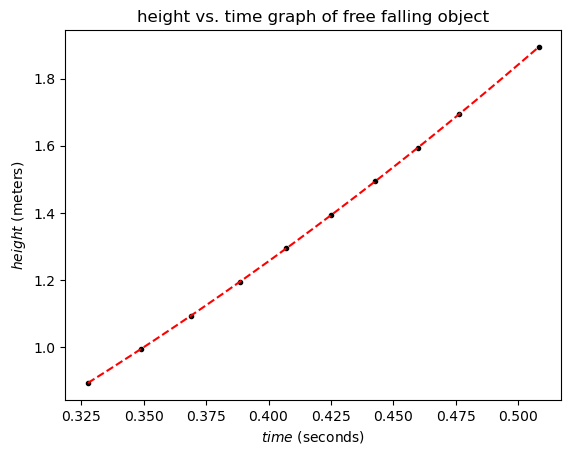

In [745]:
#Data processing and analysis, plotting:

#raw data 

plt.plot(time, height, 'k.')
plt.xlabel('$time$ (seconds)')
plt.ylabel('$height$ (meters)')
plt.title('height vs. time graph of free falling object')

#curve fit

plt.plot(time_fit, height_fit, 'r--')

plt.show()

**Describing the pattern in the processed data:**  


In [746]:
#Calculations of e.a. measurement uncertainties, and providing final answers.


**Notes:**  

## Discussion



## Conclusion

## Additional notes, remarks, explanations, thoughts etc